# Writing Good Code  

简化的索罗模型：
$$k_{t+1} = sk^\alpha +(1-\sigma)k_t,\ \ t = 0,1,2...$$
其中$k_t$为t时期的资本存量，$s,\alpha,\sigma$分别为储蓄率，生产参数，折旧,假设$k_0 = 1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


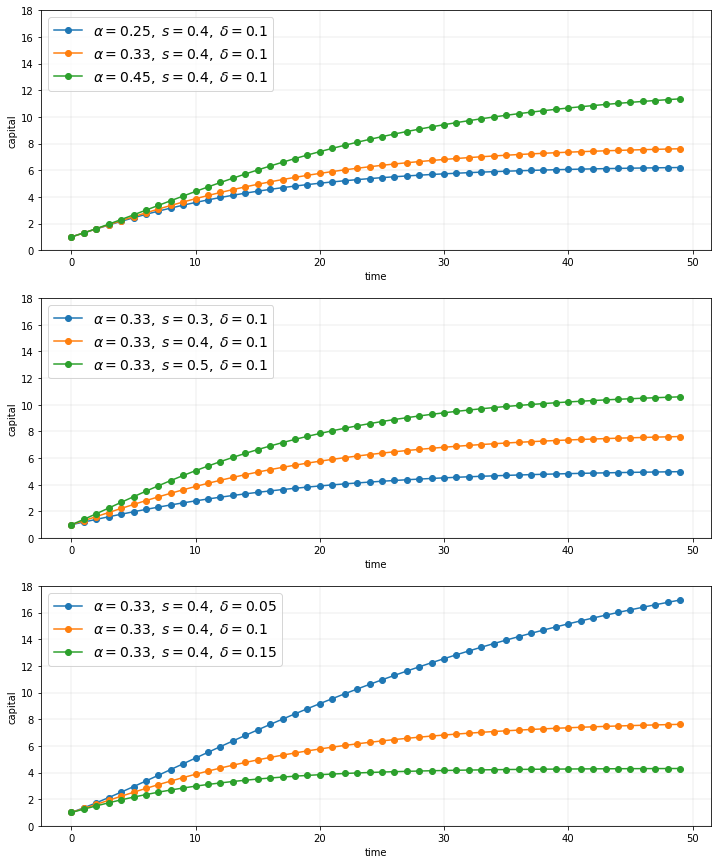

In [2]:
k = np.empty(50)
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

δ = 0.1
s = 0.4
α = (0.25, 0.33, 0.45)

for j in range(3):
    k[0] = 1
    for t in range(49):          # len(k)-1
        k[t+1] = s * k[t]**α[j] + (1 - δ) * k[t]
    label = "$\\alpha = {},\; s = {},\; \\delta={}$"
    axes[0].plot(k, 'o-', label=label.format(α[j], s, δ))

axes[0].grid(lw=0.2)
axes[0].set_ylim(0, 18)
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different s
δ = 0.1
α = 0.33
s = (0.3, 0.4, 0.5)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s[j] * k[t]**α + (1 - δ) * k[t]
    label = "$\\alpha = {},\; s = {},\; \\delta={}$"
    axes[1].plot(k, 'o-', label=label.format(α, s[j], δ))

axes[1].grid(lw=0.2)
axes[1].set_xlabel('time')
axes[1].set_ylabel('capital')
axes[1].set_ylim(0, 18)
axes[1].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different δ
δ = (0.05, 0.1, 0.15)
α = 0.33
s = 0.4

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α + (1 - δ[j]) * k[t]
    label = "$\\alpha = {},\; s = {},\; \\delta={}$"
    axes[2].plot(k, 'o-', label=label.format(α, s, δ[j]))

axes[2].set_ylim(0, 18)
axes[2].set_xlabel('time')
axes[2].set_ylabel('capital')
axes[2].grid(lw=0.2)
axes[2].legend(loc='upper left', frameon=True, fontsize=14)

plt.show()

- 不要使用magic number
- 不要重复代码
- 尽量减少全局变量

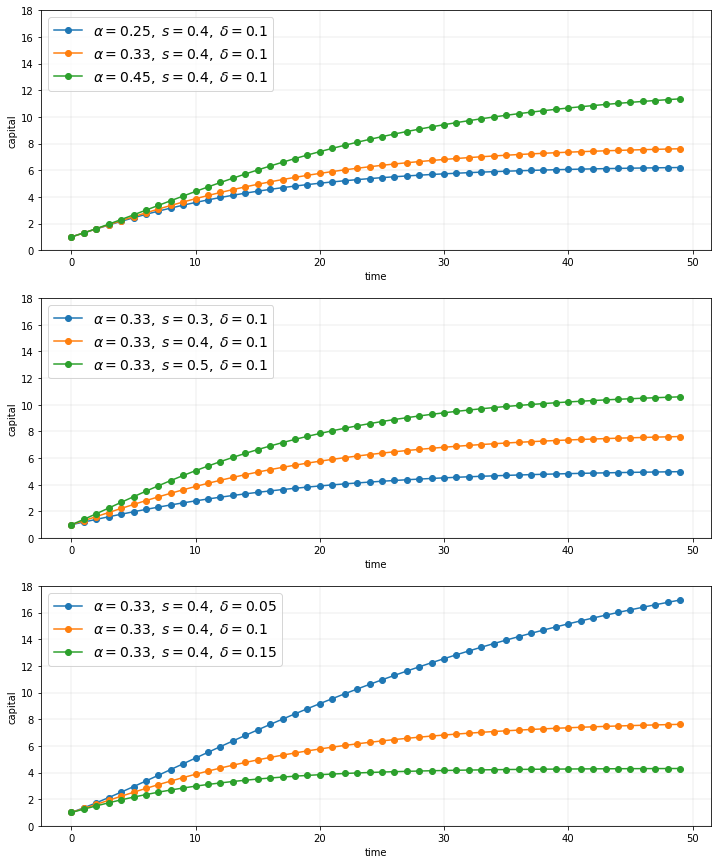

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

def plot_path(ax, αs, s_vals, δs, series_length=50):
    """
    Add a time series plot to the axes ax for all given parameters.
    """
    k = np.empty(series_length)
    label = "$\\alpha = {},\; s = {},\; \\delta = {}$"

    for (α, s, δ) in product(αs, s_vals, δs):
        k[0] = 1
        for t in range(series_length-1):
            k[t+1] = s * k[t]**α + (1 - δ) * k[t]
        ax.plot(k, 'o-', label=label.format(α, s, δ))

    ax.grid(lw=0.2)
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True, fontsize=14)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Parameters (αs, s_vals, δs)
set_one = ([0.25, 0.33, 0.45], [0.4], [0.1])
set_two = ([0.33], [0.3, 0.4, 0.5], [0.1])
set_three = ([0.33], [0.4], [0.05, 0.1, 0.15])

for (ax, params) in zip(axes, (set_one, set_two, set_three)):
    αs, s_vals, δs = params
    plot_path(ax, αs, s_vals, δs)

plt.show()